## tensorflow_datasets

https://www.tensorflow.org/datasets

 * contains more than 20 public datasets
 * allows users to download all these datasets directly (`DatasetBuilder.download_and_prepare`)
 * read data from disk (with `DatasetBuilder.as_dataset`)
 * contains all informaiton about those datasets, features, ... and even citaitons


 * **Installation**
 

 
```
pip install tensorflow-datasets
```

In [25]:
tfds.list_builders()


['abstract_reasoning',
 'bair_robot_pushing_small',
 'caltech101',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_corrupted',
 'cnn_dailymail',
 'coco2014',
 'colorectal_histology',
 'colorectal_histology_large',
 'cycle_gan',
 'diabetic_retinopathy_detection',
 'dsprites',
 'dtd',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'fashion_mnist',
 'flores',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imdb_reviews',
 'iris',
 'kmnist',
 'lm1b',
 'lsun',
 'mnist',
 'moving_mnist',
 'multi_nli',
 'nsynth',
 'omniglot',
 'open_images_v4',
 'oxford_flowers102',
 'oxford_iiit_pet',
 'para_crawl',
 'quickdraw_bitmap',
 'rock_paper_scissors',
 'shapes3d',
 'smallnorb',
 'squad',
 'starcraft_video',
 'sun397',
 'svhn_cropped',
 'ted_hrlr_translate',
 'ted_multi_translate',
 'tf_flowers',
 'titanic',
 'ucf101',
 'voc2007',
 'wikipedia',
 'wmt15_translate',
 'wmt1

In [52]:
import tensorflow_datasets as tfds

# fetch by string name
mnist_bldr = tfds.builder('mnist')

assert mnist_bldr.info.features['image'].shape == (28, 28, 1)
assert mnist_bldr.info.features['label'].num_classes == 10
assert mnist_bldr.info.splits['train'].num_examples == 60000

In [64]:
print(mnist_bldr.info)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10)
    },
    total_num_examples=70000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=10000>,
        'train': <tfds.core.SplitInfo num_examples=60000>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @article{lecun2010mnist,
          title={MNIST handwritten digit database},
          author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
          journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
          volume={2},
          year={2010}
        }
        
    """',
    redistribution_info=,
)



In [57]:
print(mnist_bldr.info.features, '\n')

print(mnist_bldr.info.citation)

print(mnist_bldr.info.features['image'])

FeaturesDict({'image': Image(shape=(28, 28, 1), dtype=tf.uint8), 'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10)}) 

@article{lecun2010mnist,
  title={MNIST handwritten digit database},
  author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
  journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
  volume={2},
  year={2010}
}

Image(shape=(28, 28, 1), dtype=tf.uint8)


In [10]:
# Download the data, prepare it, and write it to disk
mnist_bldr.download_and_prepare()

Dataset mnist downloaded and prepared to /home/vahid/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


In [58]:
# Load data from disk as tf.data.Datasets
datasets = mnist_bldr.as_dataset()

datasets

{'test': <_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

In [59]:
train_dataset, test_dataset = datasets['train'], datasets['test']
assert isinstance(train_dataset, tf.data.Dataset)

In [60]:
import numpy as np


# And convert the Dataset to NumPy arrays if you'd like
for example in tfds.as_numpy(train_dataset):
    image, label = example['image'], example['label']
    assert isinstance(image, np.ndarray)



`as_dataset() ` accepts a `batch_size` argument which will give you batches of examples instead of one example at a time. 

For small datasets that fit in memory, you can pass `batch_size=-1` to get the entire dataset at once as a `tf.Tensor`.

All `tf.data.Datasets` can easily be converted to iterables of NumPy arrays using `tfds.as_numpy()`.

As a convenience, you can do all the above with `tfds.load`, which fetches the `DatasetBuilder` by name, calls `download_and_prepare()`, and calls `as_dataset()`.

Adding your own dataset

```python
import tensorflow_datasets as tfds

datasets = tfds.load("mnist")
train_dataset, test_dataset = datasets["train"], datasets["test"]
assert isinstance(train_dataset, tf.data.Dataset)
```

In [32]:
## changing the batch-size

datasets = mnist.as_dataset(batch_size=64)
train_dataset, test_dataset = datasets['train'], datasets['test']

mnist_example, = train_dataset.take(1)
image, label = mnist_example['image'], mnist_example['label']
print(image.shape, label.shape)


(64, 28, 28, 1) (64,)


In [ ]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)

# prefetch will enable the input pipeline to asynchronously fetch batches while
# your model is training.
mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)


## CelebA

In [26]:
celeba, celeba_info = tfds.load('celeb_a', with_info=True)

Dataset celeb_a downloaded and prepared to /home/vahid/tensorflow_datasets/celeb_a/0.3.0. Subsequent calls will reuse this data.


In [68]:
print(celeba_info)

tfds.core.DatasetInfo(
    name='celeb_a',
    version=0.3.0,
    description='CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, including
 - 10,177 number of identities,
 - 202,599 number of face images, and
 - 5 landmark locations, 40 binary attributes annotations per image.

The dataset can be employed as the training and test sets for the following computer vision tasks: face attribute recognition, face detection, and landmark (or facial part) localization.
',
    urls=['http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html'],
    features=FeaturesDict({
        'attributes': FeaturesDict({'5_o_Clock_Shadow': Tensor(shape=(), dtype=tf.bool), 'Arched_Eyebrows': Tensor(shape=(), dtype=tf.bool), 'Attractive': Tensor(shape=(), dtype=tf.bool),

In [87]:
print(celeba_info.features['image'])

len(celeba_info.features['attributes']), celeba_info.features['attributes'].keys()

Image(shape=(218, 178, 3), dtype=tf.uint8)


(40,
 dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']))

#### Overview of Dataset methods:

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

```python
 |  repeat(self, count=None)
 |      Repeats this dataset `count` times.

 |  shuffle(self, buffer_size, seed=None, reshuffle_each_iteration=None)
 |      Randomly shuffles the elements of this dataset.
 |      This dataset fills a buffer with `buffer_size` elements, then randomly
 |      samples elements from this buffer, replacing the selected elements with new
 |      elements. For perfect shuffling, a buffer size greater than or equal to the
 |      full size of the dataset is required.

 |  take(self, count)
 |      Creates a `Dataset` with at most `count` elements from this dataset.

 |  from_generator(generator, output_types, output_shapes=None, args=None)
 |      Creates a `Dataset` whose elements are generated by `generator`.

 |  from_tensor_slices(tensors)
 |      Creates a `Dataset` whose elements are slices of the given tensors.

 |  from_tensors(tensors)
 |      Creates a `Dataset` with a single element, comprising the given tensors.

 |  list_files(file_pattern, shuffle=None, seed=None)
 |      A dataset of all files matching one or more glob patterns.

 |  zip(datasets)
 |      Creates a `Dataset` by zipping together the given datasets.
 |      Ex: Dataset.zip((a, d)) == { (1, 13), (2, 14) }
```

## Visualize a batch of 18 samples

(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(True, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(True, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(True, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(True, shape=(), dtype=bool)

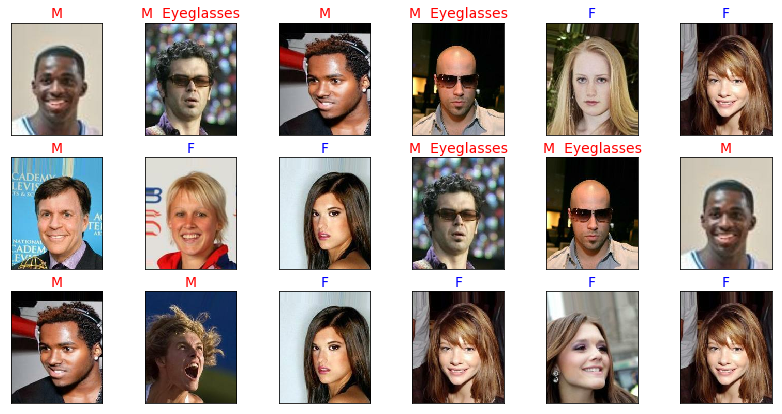

In [121]:
## Method 1: take 1 at a time


######

celeba_train = celeba['train']
celeba_valid = celeba['validation']
celeba_test = celeba['test']

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14, 7))
for i in range(3):
    for j in range(6):
        celeba_example, =  celeba_train.take(1)
        image, labels = celeba_example['image'], celeba_example['attributes']

        print(image.shape, labels['Male'], labels['Eyeglasses'])
        ax = fig.add_subplot(3, 6, i*6+j+1)
        ax.set_xticks([]); ax.set_yticks([])
        plt.imshow(image)
        if labels['Male']:
            text, color = 'M', 'red'
        else:
            text, color = 'F', 'blue'
        if labels['Eyeglasses']:
            text += '  Eyeglasses'
            
        ax.text(0.5, 1.02, text, size=14, color=color, horizontalalignment='center',
                verticalalignment='bottom', transform=ax.transAxes)

(218, 178, 3) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(True, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(True, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
(218, 178, 3) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=b

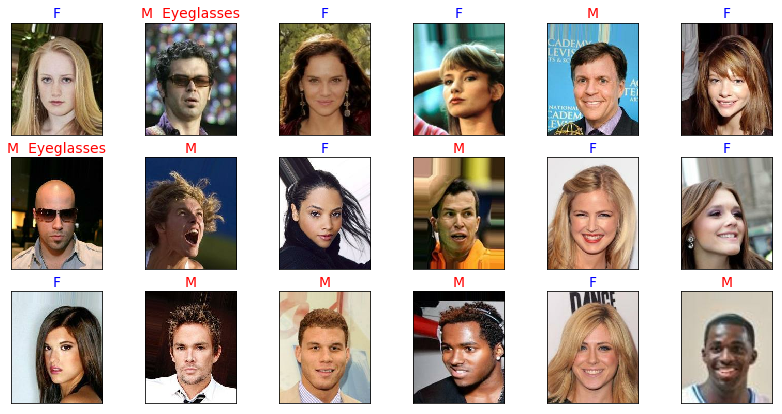

In [123]:
## Method 1: take one batch of size 18


######

celeba_train = celeba['train']
celeba_valid = celeba['validation']
celeba_test = celeba['test']

import matplotlib.pyplot as plt
%matplotlib inline

celeba_train.batch(18)
celeba_batch =  celeba_train.take(18)


fig = plt.figure(figsize=(14, 7))
for i,example in enumerate(celeba_batch):
    image, labels = example['image'], example['attributes']

    print(image.shape, labels['Male'], labels['Eyeglasses'])
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    plt.imshow(image)
    if labels['Male']:
        text, color = 'M', 'red'
    else:
        text, color = 'F', 'blue'
    if labels['Eyeglasses']:
        text += '  Eyeglasses'

    ax.text(0.5, 1.02, text, size=14, color=color, horizontalalignment='center',
            verticalalignment='bottom', transform=ax.transAxes)
    
plt.show()

## Load a split

In [85]:
cifar10_train = tfds.load('cifar10', split='train')


### combining train and test splits:
combined_splits = tfds.Split.TRAIN + tfds.Split.TEST 
cifar10_trts = tfds.load('cifar10', split=combined_splits)

## combine all:
cifar10_trts = tfds.load('cifar10', split=tfds.Split.ALL)

Dataset cifar10 downloaded and prepared to /home/vahid/tensorflow_datasets/cifar10/1.0.2. Subsequent calls will reuse this data.


## Sub-split:

In [154]:
train_subsplit_1, train_subsplit_2, train_subsplit_3 = tfds.Split.TRAIN.subsplit(3)

cifar10_trainsub3 = tfds.load("cifar10", split=train_subsplit_3)

cifar10_trainsub3 = cifar10_trainsub3.batch(1000)

n = 0
for i, batch in enumerate(cifar10_trainsub3.take(-1)):
    n += len(batch['image'])
    print(i, n, batch['image'].shape)

print(' ===> ', i, n)

0 1000 (1000, 32, 32, 3)
1 2000 (1000, 32, 32, 3)
2 3000 (1000, 32, 32, 3)
3 4000 (1000, 32, 32, 3)
4 5000 (1000, 32, 32, 3)
5 6000 (1000, 32, 32, 3)
6 7000 (1000, 32, 32, 3)
7 8000 (1000, 32, 32, 3)
8 9000 (1000, 32, 32, 3)
9 10000 (1000, 32, 32, 3)
10 11000 (1000, 32, 32, 3)
11 12000 (1000, 32, 32, 3)
12 13000 (1000, 32, 32, 3)
13 14000 (1000, 32, 32, 3)
14 15000 (1000, 32, 32, 3)
15 16000 (1000, 32, 32, 3)
16 17000 (1000, 32, 32, 3)
 ===>  16 17000


## Percent-slicing

In [157]:
middle_33to66_percent = tfds.Split.TRAIN.subsplit(tfds.percent[33:66])

cifar_33to66_percent = tfds.load("cifar10", split=middle_33to66_percent)

cifar_33to66_percent = cifar_33to66_percent.batch(1000)

n = 0
for i, batch in enumerate(cifar_33to66_percent.take(-1)):
    n += len(batch['image'])
    print(i, n, batch['image'].shape)

print(' ===> ', i, n)

0 1000 (1000, 32, 32, 3)
1 2000 (1000, 32, 32, 3)
2 3000 (1000, 32, 32, 3)
3 4000 (1000, 32, 32, 3)
4 5000 (1000, 32, 32, 3)
5 6000 (1000, 32, 32, 3)
6 7000 (1000, 32, 32, 3)
7 8000 (1000, 32, 32, 3)
8 9000 (1000, 32, 32, 3)
9 10000 (1000, 32, 32, 3)
10 11000 (1000, 32, 32, 3)
11 12000 (1000, 32, 32, 3)
12 13000 (1000, 32, 32, 3)
13 14000 (1000, 32, 32, 3)
14 15000 (1000, 32, 32, 3)
15 16000 (1000, 32, 32, 3)
16 16500 (500, 32, 32, 3)
 ===>  16 16500
